In [1]:
%pylab inline
from sci378 import *
from lmfit import *

Populating the interactive namespace from numpy and matplotlib
Version:  0.0.18


In [2]:
data=pd.read_csv('fludata3.csv')
data=data[data['region']=='Bay Area']
data=data[data['season']=='2018-2019']
data

,season,date_code,weekending,region,Total_ILI,Total_Patients_Seen,Percent_ILI,Number_Providers_Reporting
5322,2018-2019,201840,10/6/2018,Bay Area,452,20879,2.16,30
5328,2018-2019,201841,10/13/2018,Bay Area,406,20526,1.98,30
5334,2018-2019,201842,10/20/2018,Bay Area,444,20635,2.15,29
5340,2018-2019,201843,10/27/2018,Bay Area,517,21091,2.45,29
5346,2018-2019,201844,11/3/2018,Bay Area,574,21515,2.67,31
5352,2018-2019,201845,11/10/2018,Bay Area,595,20815,2.86,32
5358,2018-2019,201846,11/17/2018,Bay Area,672,20915,3.21,33
5364,2018-2019,201847,11/24/2018,Bay Area,522,16982,3.07,33
5370,2018-2019,201848,12/1/2018,Bay Area,747,22422,3.33,32
5376,2018-2019,201849,12/8/2018,Bay Area,761,20030,3.80,29


In [3]:
def SIRmodel(δ,e,γ,i):
    values=δ*e-γ*i
    return values

lemodel=Model(SIRmodel)
params=lemodel.make_params()
params

name,value,initial value,min,max,vary
e,-inf,None,-inf,inf,True
γ,-inf,None,-inf,inf,True
i,-inf,None,-inf,inf,True


In [4]:
t_data=data['weekending']
t_data=date_to_float(data['weekending'])
t_data=t_data-min(t_data)
y_data=data['Percent_ILI']

In [5]:
params['e']=Parameter("e",min=-100,max=1000,value=0)
params['γ']=Parameter("γ",min=0,max=200,value=.1)
params['i']=Parameter("i",min=-100,max=100,value=0)
params
#how do I tell model these are not all parameters

name,value,initial value,min,max,vary
e,0.00000000,0,-100.000000,1000.00000,True
γ,0.10000000,0.1,0.00000000,200.000000,True
i,0.00000000,0,-100.000000,100.000000,True


In [6]:
results = lemodel.fit(y_data, params, δ=t_data)
results

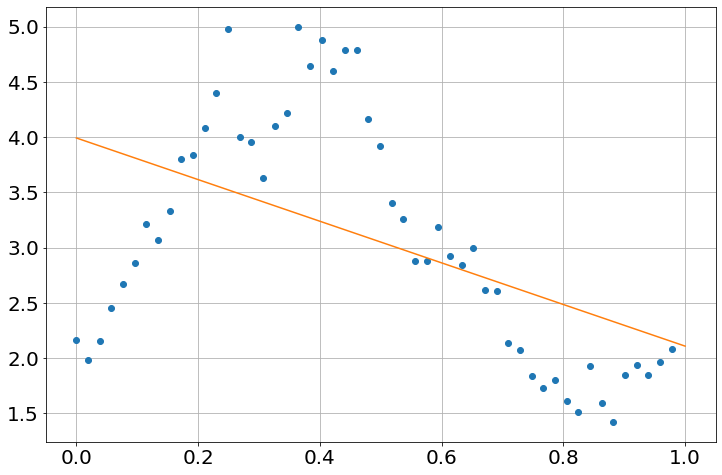

In [7]:
plot(t_data,y_data,'o')
t_fake=linspace(0,1,52)
y_fake=results.eval(δ=t_data)
plot(t_fake,y_fake,'-')    

In [8]:
from pyndamics3 import Simulation

pyndamics3  version  0.0.28


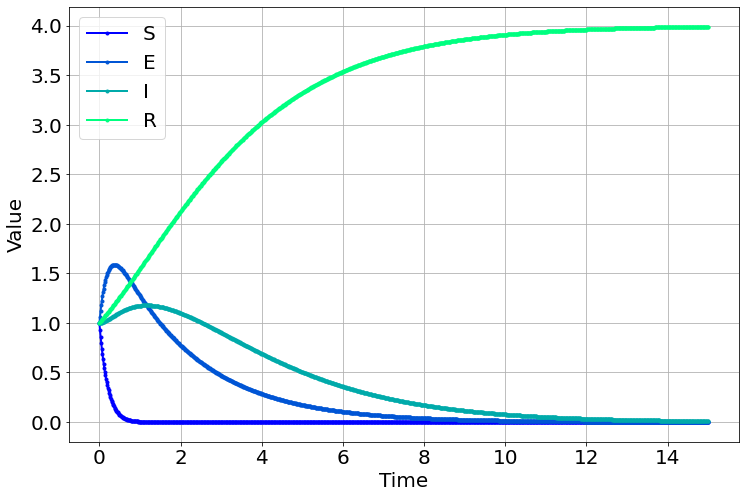

<Figure size 864x576 with 0 Axes>

In [25]:
sim=Simulation()
sim.add("N=S+E+I+R",10)
sim.add("S'=-β*S*I/N",1,plot=1)
sim.add("E'= β*I*S/N-δ*E",1,plot=1)
sim.add("I'=δ*E-γ*I",1,plot=1)
sim.add("R'=γ*I",1,plot=1)
sim.params(β=20,δ=.5,γ=.5)
sim.run(15)

In [10]:
from pyndamics3.fit import fit, Parameter

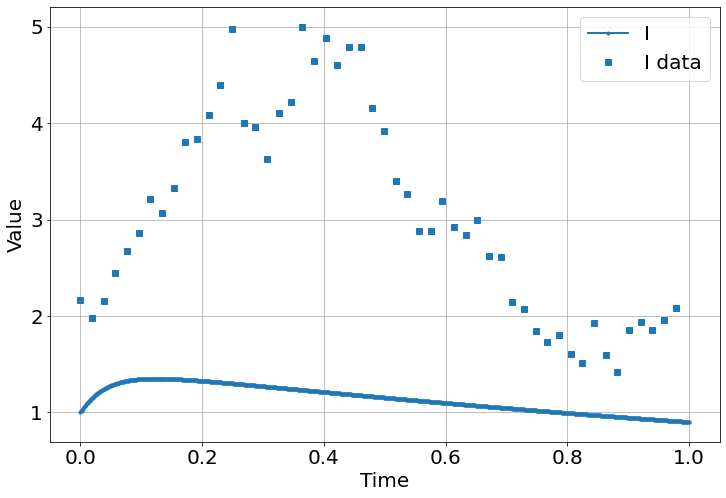

<Figure size 864x576 with 0 Axes>

In [11]:
sim=Simulation()
sim.add("S'=-β*S*I",1)
sim.add("E'= β*I*S*-δ*E",1)
sim.add("I'=δ*E-γ*I",1,plot=True)
sim.add("R'=γ*I",1)
sim.add_data(t=t_data,I=y_data,plot=True)
sim.params(β=2,δ=10,γ=.5)
sim.run(1)

In [12]:
result2=fit(sim,
           Parameter("β",value=1,min=0),
           Parameter("δ",value=1,min=0),
           Parameter("γ",value=1,min=0))
result2

Text(0, 0.5, 'Percent Infected')

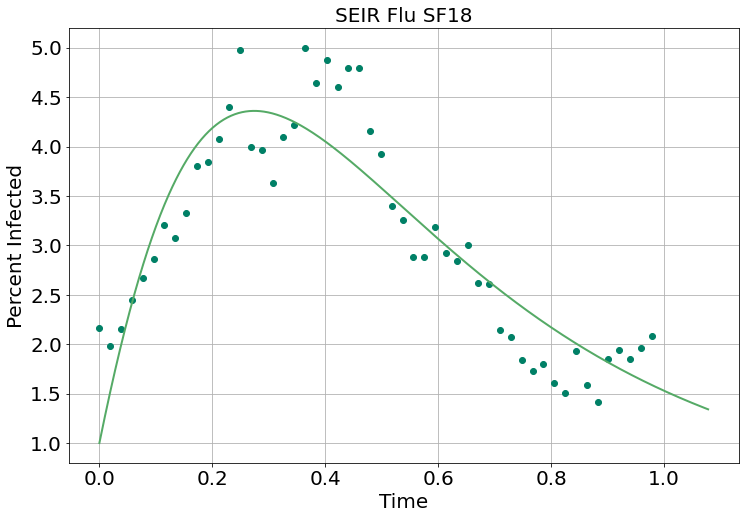

In [13]:
#sim.run(1).
set_plot_colors('summer',4)
plot(t_data,y_data,'o')
plot(sim.t,sim.I)
title('SEIR Flu SF18')
xlabel('Time')
ylabel('Percent Infected')

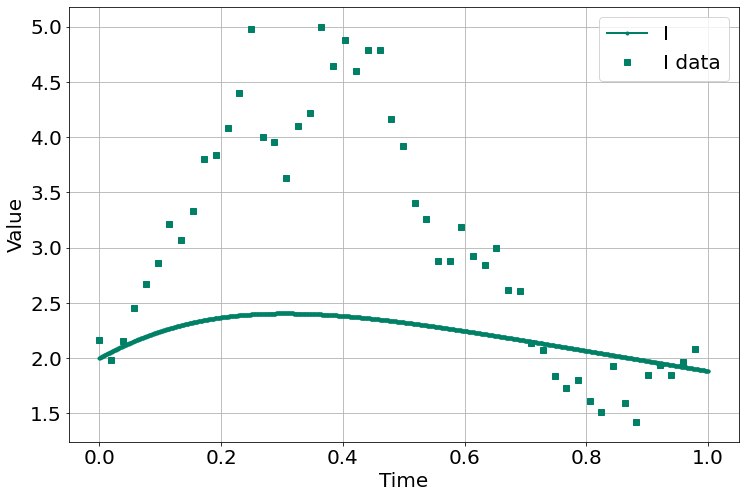

<Figure size 864x576 with 0 Axes>

In [14]:
simm=Simulation()
simm.add("S'=-β*S*I",1)
simm.add("I'=β*S*I-γ*I",2,plot=True)
simm.add("R'=γ*I",1)
simm.add_data(t=t_data,I=y_data,plot=True)
simm.params(β=2,γ=.5)
simm.run(1)

In [15]:
result3=fit(simm,
           Parameter("β",value=1,min=0),
           Parameter("γ",value=1,min=0))
result3

Text(0, 0.5, 'Percent Exposed')

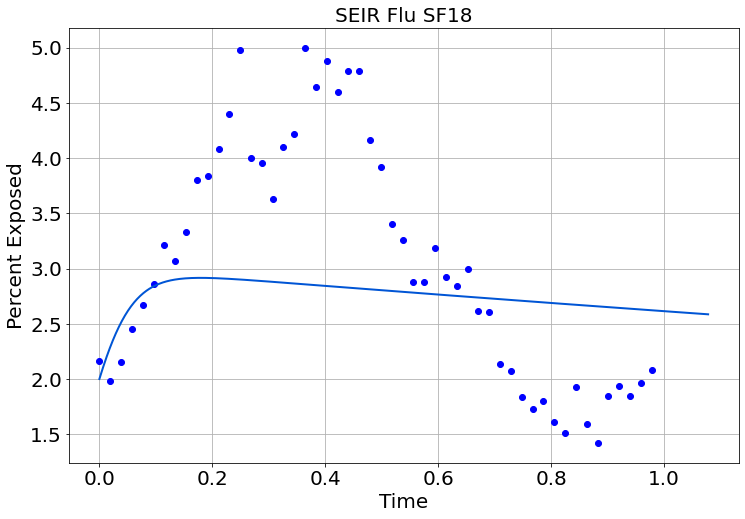

In [16]:
#sim.run(1).
set_plot_colors('winter',4)
plot(t_data,y_data,'o')
plot(simm.t,simm.I)
title('SEIR Flu SF18')
xlabel('Time')
ylabel('Percent Exposed')

In [17]:
#I need to get some new data, one that has both E & I!! My bad...this was good practice at least

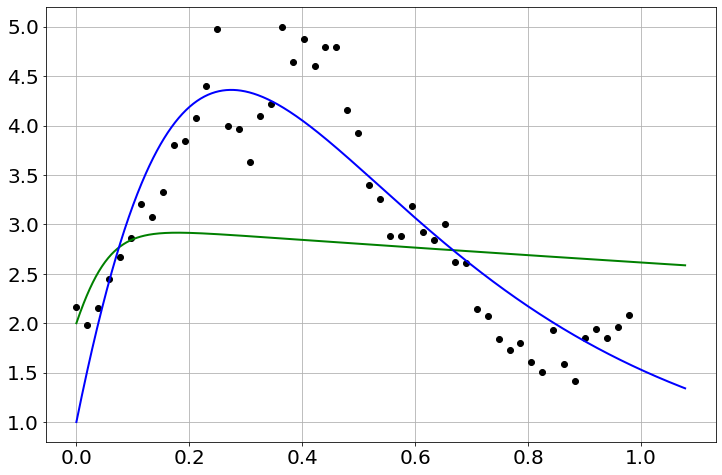

In [18]:
plot(t_data,y_data,'ko')
plot(simm.t,simm.I,'g-')
plot(sim.t,sim.I,'b-')